# Regression Logistique

In [1]:
# Import des librairies
import pandas as pd
import numpy as np
import sklearn as sk

## 1. Import des données

In [2]:
# Import des données
data = pd.read_csv("data/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# On supprime la colonne Id
data = data.drop("Id", axis=1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# 100 première lignes 
data_2=data.head(100)

In [5]:
# Répatir les données en données d'entrainement et données de validation
from sklearn.model_selection import train_test_split
X = data_2.drop("Species", axis=1)
y = data_2.Species
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0)

In [6]:
# On transforme la variable Species en 2 variables binaires
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train = enc.fit_transform(y_train)
y_valid = enc.transform(y_valid)

In [7]:
X_train.shape

(80, 4)

## 2. Modèle de régression logistique

In [8]:
# Regression linéaire
def Z(x, w, b):
    return np.dot(x, w) + b

In [9]:
## Fonction logistique
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [10]:
# Fonction de prédiction
def prediction(X, w, b):
    z=Z(X,w,b)
    y_hat = sigmoid(z)
    y_hat = np.where(y_hat>0.5, 1,0)
    return y_hat

In [11]:
# Test 


In [12]:
y_train

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0]])

In [13]:
def loss_function(y, y_hat):
    m = y.shape[0]
    return -1 / m * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

In [18]:
## Fonction de coût
def cost_logistic(X, y, w, b):
    z=Z(X,w,b)
    y_hat=sigmoid(z)
    cost = loss_function(y, y_hat)
    return cost

In [19]:
def gradient(X, y, y_hat):
    m= X.shape[0]
    dw = 1/m * np.dot(X.T, (y_hat - y))
    db = 1/m * np.sum(y_hat - y)
    return dw, db

In [48]:
## Fonction d'entrainement
def train_logistic(X, y, w, b, learning_rate, iterations):
    cost_hist =[]
    for it in range(iterations):
        z = Z(X, w, b)
        y_hat = sigmoid(z)
        # Calcul des gradients
        dw, db = gradient(X, y, y_hat)
        # Mise à jour des paramètres
        w = w - learning_rate * dw
        b = b - learning_rate * db
        # Cout 
        cost = cost_logistic(X, y, w, b)
        cost_hist.append(cost)
        if it % 100 == 0:
            print("iter : {}, cost : {}".format(it, cost))
    return w, b, cost_hist

In [49]:
## Test
w = np.zeros((X_train.shape[1], 1))
b = 0  
learning_rate = 0.01
it = 1000
w, b, cost_hist = train_logistic(X_train, y_train, w, b, learning_rate, it)

iter : 0, cost : 0.686977610794238
iter : 100, cost : 0.39104516993767113
iter : 200, cost : 0.26235368408928056
iter : 300, cost : 0.19467023780719128
iter : 400, cost : 0.15399486132239112
iter : 500, cost : 0.12715342919219272
iter : 600, cost : 0.10821833455093346
iter : 700, cost : 0.09418577743822877
iter : 800, cost : 0.08338777215695359
iter : 900, cost : 0.07482972545842333


In [50]:
# Visualiser la progression des couts 
import matplotlib.pyplot as plt

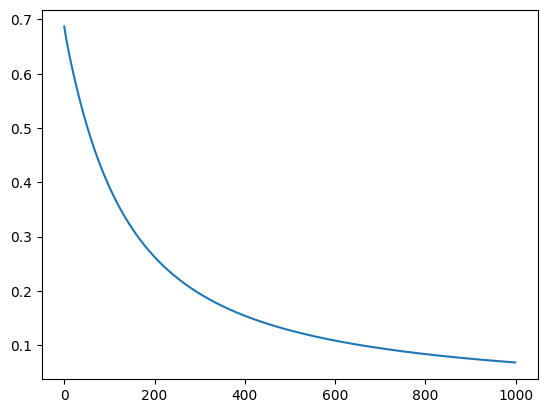

In [51]:
plt.plot(cost_hist)

In [42]:
cost_hist

[0.686977610794238,
 0.6812595847188226,
 0.6758953714679357,
 0.6708102458384413,
 0.6659471149895775,
 0.6612623652024731,
 0.6567226696353791,
 0.6523025440687866,
 0.6479824801190679,
 0.6437475218000659,
 0.6395861811911575,
 0.6354896128448951,
 0.631450985311143,
 0.6274650026981184,
 0.6235275403861604,
 0.6196353675825076,
 0.615785935946508,
 0.6119772184947385,
 0.6082075867820088,
 0.6044757172312004,
 0.6007805196702298,
 0.5971210827944751,
 0.5934966325343106,
 0.5899065002661156,
 0.586350098534141,
 0.5828269025052691,
 0.579336435800887,
 0.5758782596716098,
 0.5724519647255731,
 0.5690571646077531,
 0.5656934911701902,
 0.5623605907816401,
 0.5590581215081091,
 0.5557857509590344,
 0.5525431546422365,
 0.5493300147076978,
 0.5461460189884629,
 0.5429908602685244,
 0.5398642357240572,
 0.5367658464969794,
 0.5336953973694598,
 0.5306525965153757,
 0.5276371553103704,
 0.524648788186475,
 0.5216872125205657,
 0.5187521485484603,
 0.5158433192983856,
 0.5129604505390369

In [30]:
# Prédiction
y_hat_train = prediction(X_train, w, b)

In [23]:
y_hat_train

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0]])

In [24]:
y_valid

array([[0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

## 3. Evaluation du modèle

<AxesSubplot: >

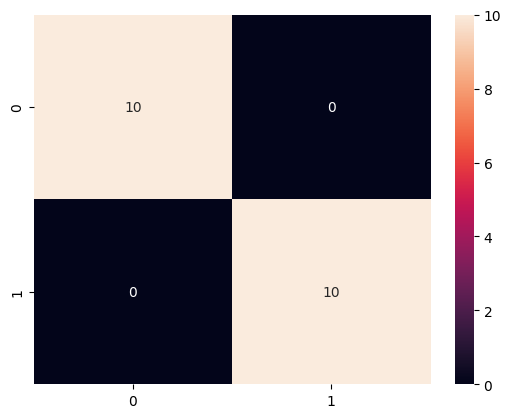

In [55]:
# Evaluation du modèle
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix=confusion_matrix(y_valid, prediction(X_valid, w, b))
sns.heatmap(cf_matrix, annot=True)